In [1]:
import os
import dotenv
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

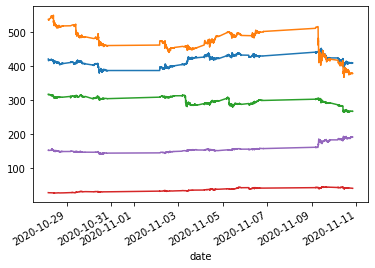

In [28]:
API_KEY = os.environ["ALPHA_VANTAGE_API_KEY"] # Your alpha vantage api key goes here
ts = TimeSeries(key=API_KEY, output_format='pandas')

tickers = ['TSLA', 'ZM', 'BABA', 'NIO', 'BA']
all_data = {}

for ticker in tickers:
    data, meta_data = ts.get_intraday(symbol=[ticker],interval='1min', outputsize='full')
    data['4. close'].plot()
    all_data[ticker] = data
    

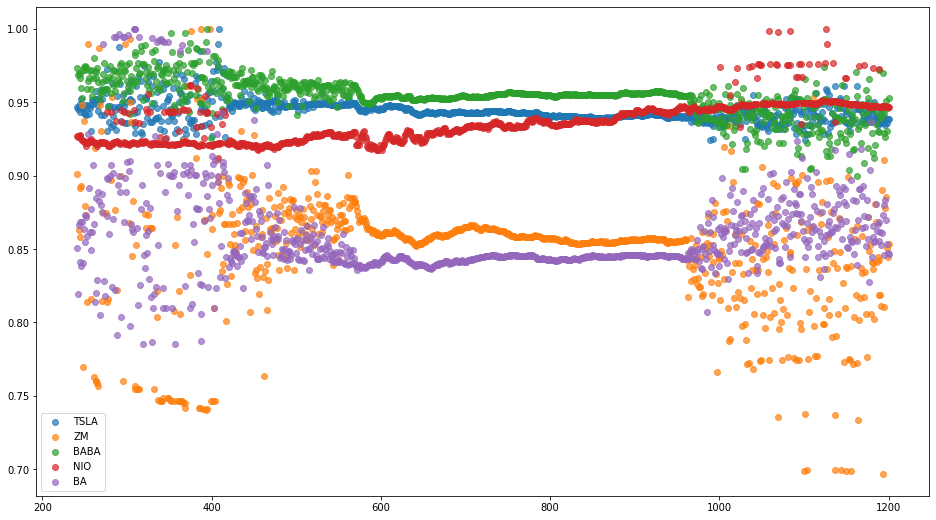

In [35]:
plt.figure(figsize=(16,9))
for ticker in tickers:
    data = all_data[ticker]
    close = data['4. close'].copy()
    close.index = 60 * close.index.hour + close.index.minute
    close = close.reset_index()
    
    minute_mean = close.groupby('date').mean().copy()
    minute_mean /= np.amax(minute_mean)
    plt.scatter(minute_mean.index, minute_mean, alpha=0.7)
    plt.legend(tickers)
#     plt.show()
    
close['4. close'] /= np.amax(close['4. close'])
